In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
ipc_types = [
    "condvar",
    "futex",
    "atomic_yield",
    "atomic_spin",
    "socket",
    "pipe",
    "sv_mq",
    "sv_sema",
    "posix_mq",
    "posix_sema",
]

benchmark_means = {
    "same": [
        3129.987523,
        2233.110543,
        1059.766264,
        0,
        3100.295511,
        2329.412374,
        1942.820547,
        3431.852606,
        1988.459765,
        1788.9716310000001,
    ],
    "hyperthread": [
        17259.790057000002,
        9580.609913,
        185.086534,
        92.539398,
        17214.191519,
        15736.00887,
        15264.259071,
        15664.128943,
        15770.76842,
        13009.83269,
    ],
    "different": [
        15211.679575,
        10385.210693,
        180.875517,
        93.888412,
        18137.507817,
        15588.288032,
        14840.572082,
        16386.21854,
        15706.800321,
        12210.04227,
    ],
}
benchmark_stdev = {
    "same": [
        171.52923560890198,
        81.70365188180965,
        35.88934622426313,
        0,
        164.08166836516395,
        86.03377633997233,
        119.75898770798982,
        62.754883882002694,
        113.83627798045893,
        93.20515917112675,
    ],
    "hyperthread": [
        1787.682894088294,
        2143.589990986164,
        35.91911089023492,
        15.17559191609202,
        1672.0519569136084,
        394.77989873084465,
        599.1292806042334,
        563.4797031604048,
        412.0575526687649,
        520.7651430140401,
    ],
    "different": [
        494.22609573762946,
        1335.2814079385848,
        35.5799537519529,
        1.2772557321392222,
        2080.1860592547278,
        603.4258270168451,
        300.56557641527536,
        474.76726878875303,
        289.6507759363305,
        631.810870998439,
    ],
}

In [18]:

import subprocess
from statistics import mean, stdev
from collections import defaultdict

REPEAT_TRIALS = 10

# Returns ping-pong time divided by 2
def run_command(name):
    return float(subprocess.run([name], capture_output=True).stdout.decode('utf-8').strip()) / (num_iters * 2)

def run_benchmark(name, dir='./'):
    return [run_command(dir + name) for i in range(REPEAT_TRIALS)]

num_iters = 1000 * 100
ipc_types = ['condvar', 'futex', 'atomic_yield', 'atomic_spin','socket', 'pipe', 'sv_mq', 'sv_sema', 'posix_mq', 'posix_sema']

benchmark_means = defaultdict(list)
benchmark_stdevs = defaultdict(list)

for ipc in ipc_types:
    for topology in ['same', 'hyperthread', 'different']:
        name = ipc + '_' + topology
        print(name)
        if name == 'atomic_spin_same':
            benchmark_means[topology].append(0)
            benchmark_stdevs[topology].append(0)
        else:
            runs = run_benchmark(name, './builddir/')
            benchmark_means[topology].append(mean(runs))
            benchmark_stdevs[topology].append(stdev(runs))

print(benchmark_means)
print(benchmark_stdev)

condvar_same
condvar_hyperthread
condvar_different
futex_same
futex_hyperthread
futex_different
atomic_yield_same
atomic_yield_hyperthread
atomic_yield_different
atomic_spin_same
atomic_spin_hyperthread
atomic_spin_different
socket_same
socket_hyperthread
socket_different
pipe_same
pipe_hyperthread
pipe_different
sv_mq_same
sv_mq_hyperthread
sv_mq_different
sv_sema_same
sv_sema_hyperthread
sv_sema_different
posix_mq_same
posix_mq_hyperthread
posix_mq_different
posix_sema_same
posix_sema_hyperthread
posix_sema_different
defaultdict(<class 'list'>, {'same': [2997.596415, 1922.407071, 1080.677831, 0, 2929.5798065, 2377.1797585, 1832.825254, 3413.1658595, 1421.011226, 1455.8298485], 'hyperthread': [15484.3593675, 10657.3636465, 183.7006685, 87.4357075, 19638.225001, 15265.443797, 15093.4455225, 15104.5144505, 12549.3191895, 6962.9663105], 'different': [14945.9115565, 9860.326287, 192.0612405, 82.541679, 16744.462206, 15304.877619500001, 15223.08516, 12478.1607305, 12529.9974965, 6606.45110

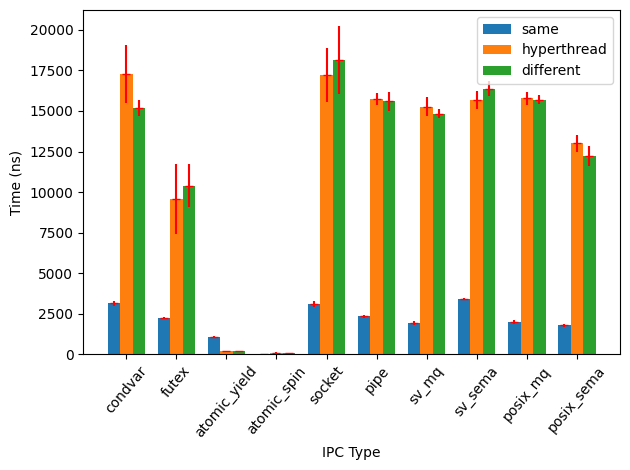

In [35]:
# fig, ax = plt.subplots(layout="constrained")
fig, ax = plt.subplots()

# graph settings
width = 0.25
multiplier = 0
x = np.arange(len(ipc_types))

for attribute, measurement in benchmark_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    # ax.bar_label(rects)#, padding=3)
    err = ax.errorbar(x=x + offset, y=measurement, yerr=benchmark_stdev[attribute], fmt="_r")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Time (ns)")
# ax.set_title("IPC Type")
ax.set_xlabel("IPC Type")
plt.xticks(rotation=50)
ax.set_xticks(x + width, ipc_types)
ax.legend()
#ax.set_ylim(0, 250)

plt.tight_layout()
plt.savefig("benchmark_graph.png")
plt.show()